In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Cyclegan

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

In [3]:
from cgan.options.train_options import *

In [4]:
opt = TrainOptions().parse(['--dataroot', '/home/ubuntu/data/cyclegan/maps2watercolor', '--nThreads', '8', '--no_dropout',
                           '--niter', '100', '--niter_decay', '100', '--name', 'nodrop', '--gpu_ids', '0'])

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: /home/ubuntu/data/cyclegan/maps2watercolor
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 286
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 8
n_layers_D: 3
name: nodrop
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [5]:
from cgan.options.train_options import TrainOptions
from cgan.data.data_loader import CreateDataLoader
from cgan.models.models import create_model

In [6]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

CustomDatasetDataLoader
dataset [UnalignedDataset] was created


1376

In [7]:
model = create_model(opt)

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inpla

In [8]:
# opt.niter=9
# opt.niter_decay=1

In [9]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

1376it [08:23,  2.74it/s]
End of epoch 66 / 200 	 Time Taken: 503 sec
learning rate = 0.0002000
1376it [08:21,  2.75it/s]
End of epoch 67 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
1376it [08:22,  2.74it/s]
End of epoch 68 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
1376it [08:21,  2.74it/s]
End of epoch 69 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
55it [00:20,  2.70it/s]saving the latest model (epoch 70, total_steps 95000)
695it [04:14,  2.74it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



927it [05:39,  2.73it/s]saving the latest model (epoch 73, total_steps 100000)
1376it [08:24,  2.73it/s]
End of epoch 73 / 200 	 Time Taken: 504 sec
learning rate = 0.0002000
1376it [08:25,  2.72it/s]
End of epoch 74 / 200 	 Time Taken: 505 sec
learning rate = 0.0002000
374it [02:16,  2.74it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:21,  2.74it/s]
End of epoch 78 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
1376it [08:21,  2.74it/s]
End of epoch 79 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
264it [01:36,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:21,  2.75it/s]
End of epoch 82 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
1376it [08:24,  2.73it/s]
End of epoch 83 / 200 	 Time Taken: 504 sec
learning rate = 0.0002000
791it [04:48,  2.74it/s]saving the latest model (epoch 84, total_steps 115000)
1376it [08:22,  2.74it/s]
End of epoch 84 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
168it [01:01,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:22,  2.74it/s]
End of epoch 87 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
287it [01:45,  2.72it/s]saving the latest model (epoch 88, total_steps 120000)
1376it [08:25,  2.72it/s]
End of epoch 88 / 200 	 Time Taken: 505 sec
learning rate = 0.0002000
1376it [08:21,  2.74it/s]
End of epoch 89 / 200 	 Time Taken: 501 sec
learning rate = 0.0002000
172it [01:02,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:20,  2.75it/s]
End of epoch 92 / 200 	 Time Taken: 500 sec
learning rate = 0.0002000
1376it [08:23,  2.73it/s]
End of epoch 93 / 200 	 Time Taken: 503 sec
learning rate = 0.0002000
1376it [08:22,  2.74it/s]
End of epoch 94 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
198it [01:12,  2.72it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:22,  2.74it/s]
End of epoch 97 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
1376it [08:22,  2.74it/s]
End of epoch 98 / 200 	 Time Taken: 502 sec
learning rate = 0.0002000
151it [00:55,  2.73it/s]saving the latest model (epoch 99, total_steps 135000)
1376it [08:24,  2.73it/s]
End of epoch 99 / 200 	 Time Taken: 504 sec
learning rate = 0.0002000
223it [01:21,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:22,  2.74it/s]
End of epoch 103 / 200 	 Time Taken: 502 sec
learning rate = 0.0001921
1376it [08:23,  2.73it/s]
End of epoch 104 / 200 	 Time Taken: 503 sec
learning rate = 0.0001901
253it [01:32,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:22,  2.74it/s]
End of epoch 108 / 200 	 Time Taken: 502 sec
learning rate = 0.0001822
1376it [08:21,  2.74it/s]
End of epoch 109 / 200 	 Time Taken: 501 sec
learning rate = 0.0001802
15it [00:05,  2.61it/s]saving the latest model (epoch 110, total_steps 150000)
1376it [08:22,  2.74it/s]
saving the model at the end of epoch 110, iters 151360
End of epoch 110 / 200 	 Time Taken: 502 sec
learning rate = 0.0001782
1376it [08:22,  2.74it/s]
End of epoch 111 / 200 	 Time Taken: 502 sec
learning rate = 0.0001762
1376it [08:21,  2.74it/s]
End of epoch 112 / 200 	 Time Taken: 501 sec
learning rate = 0.0001743
887it [05:23,  2.74it/s]saving the latest model (epoch 113, total_steps 155000)
1376it [08:22,  2.74it/s]
End of epoch 113 / 200 	 Time Taken: 502 sec
learning rate = 0.0001723
1376it [08:26,  2.72it/s]
End of epoch 114 / 200 	 Time Taken: 506 sec
learning rate = 0.0001703
1376it [08:22,  2.74it/s]
saving the model at the end of epoch 115, iters 158240
End of epoch 115 / 200 	 T

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:22,  2.74it/s]
End of epoch 144 / 200 	 Time Taken: 502 sec
learning rate = 0.0001109
1376it [08:22,  2.74it/s]
saving the model at the end of epoch 145, iters 199520
End of epoch 145 / 200 	 Time Taken: 502 sec
learning rate = 0.0001089
479it [02:54,  2.75it/s]saving the latest model (epoch 146, total_steps 200000)
902it [05:28,  2.74it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1351it [08:10,  2.75it/s]saving the latest model (epoch 149, total_steps 205000)
1376it [08:20,  2.75it/s]
End of epoch 149 / 200 	 Time Taken: 500 sec
learning rate = 0.0001010
1376it [08:21,  2.74it/s]
saving the model at the end of epoch 150, iters 206400
End of epoch 150 / 200 	 Time Taken: 502 sec
learning rate = 0.0000990
909it [05:31,  2.74it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:21,  2.74it/s]
End of epoch 154 / 200 	 Time Taken: 501 sec
learning rate = 0.0000911
1376it [08:22,  2.74it/s]
saving the model at the end of epoch 155, iters 213280
End of epoch 155 / 200 	 Time Taken: 502 sec
learning rate = 0.0000891
1376it [08:23,  2.73it/s]
End of epoch 156 / 200 	 Time Taken: 503 sec
learning rate = 0.0000871
343it [02:04,  2.75it/s]saving the latest model (epoch 157, total_steps 215000)
1376it [08:21,  2.75it/s]
End of epoch 157 / 200 	 Time Taken: 501 sec
learning rate = 0.0000851
1376it [08:20,  2.75it/s]
End of epoch 158 / 200 	 Time Taken: 500 sec
learning rate = 0.0000832
1376it [08:23,  2.73it/s]
End of epoch 159 / 200 	 Time Taken: 503 sec
learning rate = 0.0000812
1215it [07:21,  2.75it/s]saving the latest model (epoch 160, total_steps 220000)
1376it [08:20,  2.75it/s]
saving the model at the end of epoch 160, iters 220160
End of epoch 160 / 200 	 Time Taken: 500 sec
learning rate = 0.0000792
1376it [08:19,  2.75it/s]
End of epoch 161 / 200 	

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:23,  2.73it/s]
End of epoch 168 / 200 	 Time Taken: 503 sec
learning rate = 0.0000634
1376it [08:19,  2.75it/s]
End of epoch 169 / 200 	 Time Taken: 499 sec
learning rate = 0.0000614
1137it [06:57,  2.72it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:19,  2.75it/s]
End of epoch 173 / 200 	 Time Taken: 499 sec
learning rate = 0.0000535
1376it [08:20,  2.75it/s]
End of epoch 174 / 200 	 Time Taken: 500 sec
learning rate = 0.0000515
575it [03:30,  2.74it/s]saving the latest model (epoch 175, total_steps 240000)
1144it [06:56,  2.74it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:21,  2.74it/s]
End of epoch 178 / 200 	 Time Taken: 501 sec
learning rate = 0.0000436
71it [00:26,  2.73it/s]saving the latest model (epoch 179, total_steps 245000)
1376it [08:20,  2.75it/s]
End of epoch 179 / 200 	 Time Taken: 500 sec
learning rate = 0.0000416
1100it [06:40,  2.75it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:20,  2.75it/s]
End of epoch 183 / 200 	 Time Taken: 500 sec
learning rate = 0.0000337
1376it [08:19,  2.75it/s]
End of epoch 184 / 200 	 Time Taken: 499 sec
learning rate = 0.0000317
1044it [06:21,  2.73it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:21,  2.75it/s]
End of epoch 188 / 200 	 Time Taken: 501 sec
learning rate = 0.0000238
1311it [07:55,  2.76it/s]saving the latest model (epoch 189, total_steps 260000)
1376it [08:19,  2.75it/s]
End of epoch 189 / 200 	 Time Taken: 499 sec
learning rate = 0.0000218
1064it [06:27,  2.75it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



807it [04:53,  2.75it/s]saving the latest model (epoch 193, total_steps 265000)
1376it [08:20,  2.75it/s]
End of epoch 193 / 200 	 Time Taken: 500 sec
learning rate = 0.0000139
1376it [08:20,  2.75it/s]
End of epoch 194 / 200 	 Time Taken: 500 sec
learning rate = 0.0000119
888it [05:22,  2.75it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1376it [08:20,  2.75it/s]
End of epoch 198 / 200 	 Time Taken: 500 sec
learning rate = 0.0000040
1376it [08:22,  2.74it/s]
End of epoch 199 / 200 	 Time Taken: 502 sec
learning rate = 0.0000020
894it [05:24,  2.75it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [11]:
def get_one(data):
    model.set_input(data)
    model.test()
    return list(model.get_current_visuals().values())

In [12]:
model.save(201)

In [23]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    print(o['A_paths'],o['B_paths'])
#     break
    test_ims.append(get_one(o))

['/home/ubuntu/data/cyclegan/maps2watercolor/trainA/WORLD_IMAGERY_WORLD_IMAGERY_25076_18739.jpg'] ['/home/ubuntu/data/cyclegan/maps2watercolor/trainB/WATER_COLOR_WATER_COLOR_25083_18732.jpg']
['/home/ubuntu/data/cyclegan/maps2watercolor/trainA/WORLD_IMAGERY_WORLD_IMAGERY_25065_18730.jpg'] ['/home/ubuntu/data/cyclegan/maps2watercolor/trainB/WATER_COLOR_WATER_COLOR_25070_18751.jpg']
['/home/ubuntu/data/cyclegan/maps2watercolor/trainA/WORLD_IMAGERY_WORLD_IMAGERY_25066_18730.jpg'] ['/home/ubuntu/data/cyclegan/maps2watercolor/trainB/WATER_COLOR_WATER_COLOR_25090_18756.jpg']
['/home/ubuntu/data/cyclegan/maps2watercolor/trainA/WORLD_IMAGERY_WORLD_IMAGERY_25071_18747.jpg'] ['/home/ubuntu/data/cyclegan/maps2watercolor/trainB/WATER_COLOR_WATER_COLOR_25090_18757.jpg']
['/home/ubuntu/data/cyclegan/maps2watercolor/trainA/WORLD_IMAGERY_WORLD_IMAGERY_25064_18739.jpg'] ['/home/ubuntu/data/cyclegan/maps2watercolor/trainB/WATER_COLOR_WATER_COLOR_25079_18759.jpg']
['/home/ubuntu/data/cyclegan/maps2waterc

In [24]:
def show_grid(ims):
    fig,axes = plt.subplots(2,3,figsize=(9,6))
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax);
    fig.tight_layout()

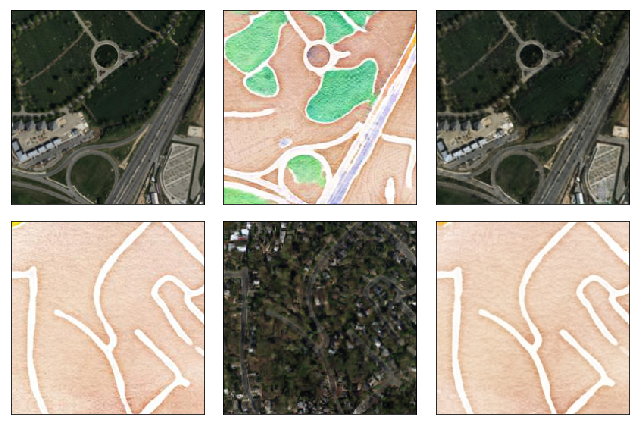

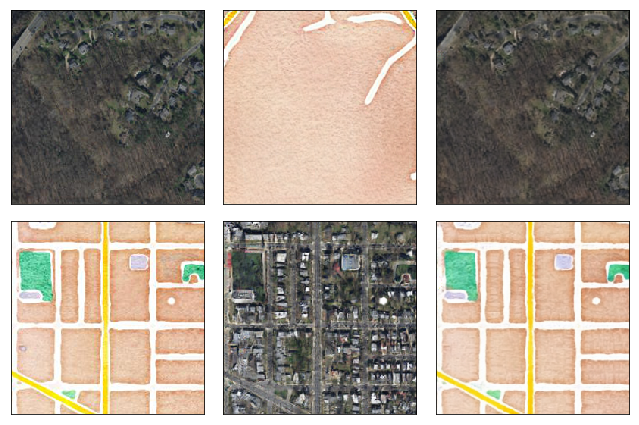

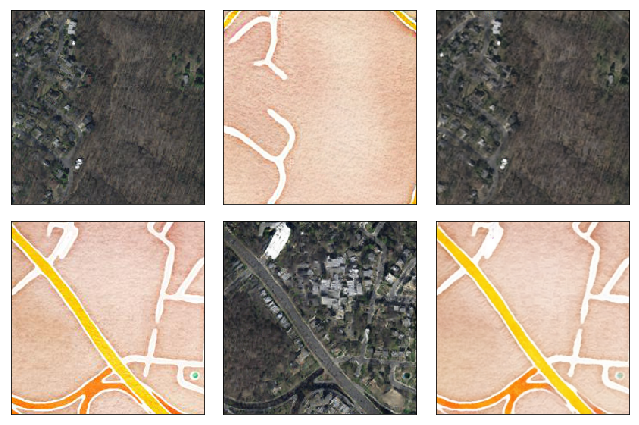

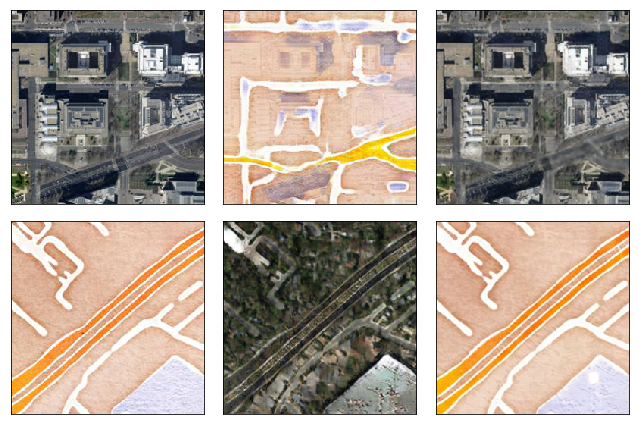

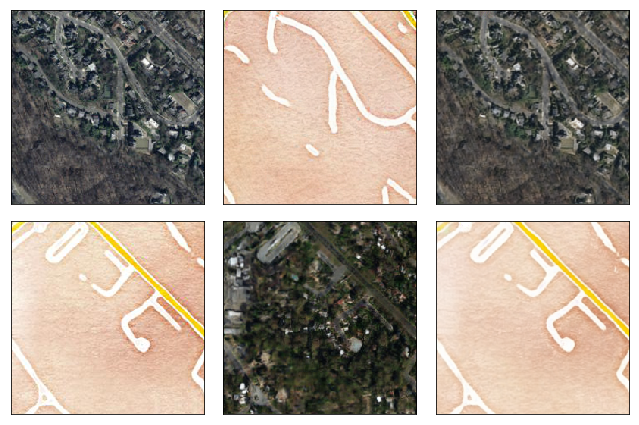

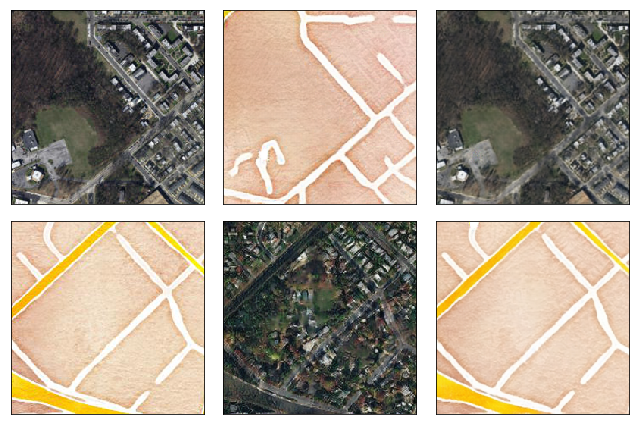

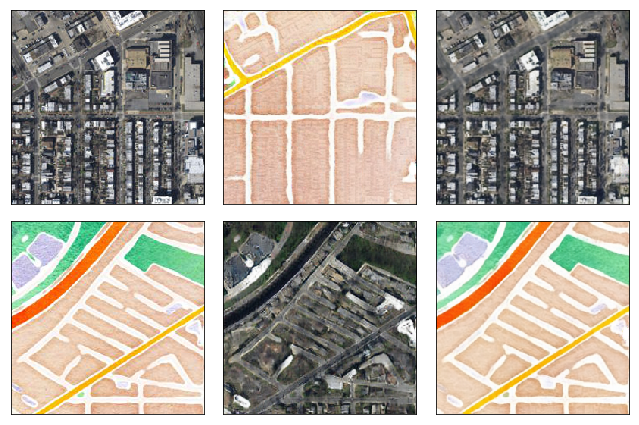

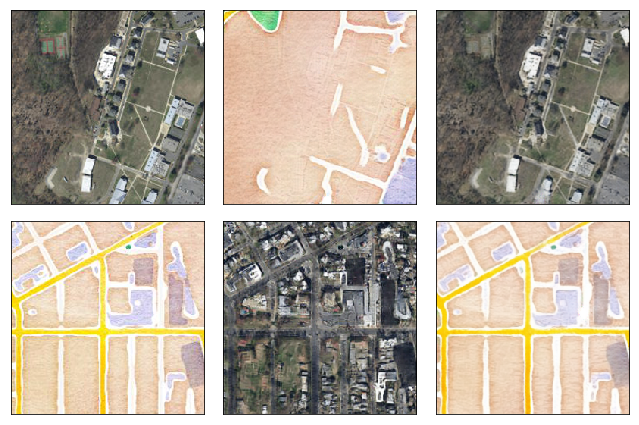

In [25]:
for i in range(8): show_grid(test_ims[i])

In [16]:
#! wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip

## fin